In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import seaborn.objects as so
# from unidecode import unidecode

In [5]:
fn = './data/Airbnb Data/listings.csv'
listings = pd.read_csv(fn,encoding='ISO-8859-1')

C:\Users\jmgar\AppData\Local\Temp\ipykernel_12900\288134736.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv(fn,encoding='ISO-8859-1')


In [6]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [8]:
listings.property_type.value_counts()

Entire apartment                138989
Private room in apartment        47322
Private room in house            13292
Entire house                     13273
Entire condominium               11250
                                 ...  
Shared room in floor                 1
Shared room in parking space         1
Shared room in tent                  1
Train                                1
Tipi                                 1
Name: property_type, Length: 144, dtype: int64

In [9]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [10]:
# drop all buy new york for simpler eda
NY = listings[listings.city == 'New York']

In [11]:
# # prepare for experiment, only numeric X's
# num_cols = listings.columns[listings.dtypes != 'object'].dropna()
# listings_num=listings[num_cols].dropna()

# # drop y
# num_cols = num_cols.drop('price')


num_cols = NY.columns[NY.dtypes != 'object'].dropna()
NY_num=NY[num_cols].dropna()

# drop y
num_cols = num_cols.drop('price')

In [12]:
NY_num.head()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
26276,42449656,308165996,1.0,1.0,1.0,40.69924,-73.92763,2,1.0,125,30,1125,90.0,10.0,10.0,10.0,8.0,10.0,9.0
26277,44358310,301703046,1.0,1.0,1.0,40.74747,-73.98991,5,1.0,175,30,1125,65.0,8.0,8.0,8.0,7.0,9.0,7.0
26320,457829,2275829,1.0,1.0,1.0,40.72917,-73.98811,4,1.0,110,30,1125,85.0,9.0,9.0,9.0,9.0,10.0,9.0
26321,4956469,25537637,1.0,1.0,1.0,40.75830,-73.77232,4,1.0,81,2,1125,93.0,9.0,9.0,10.0,9.0,9.0,9.0
26322,7962707,42008401,1.0,1.0,1.0,40.75403,-73.91814,4,1.0,140,1,1125,93.0,10.0,9.0,10.0,9.0,9.0,10.0


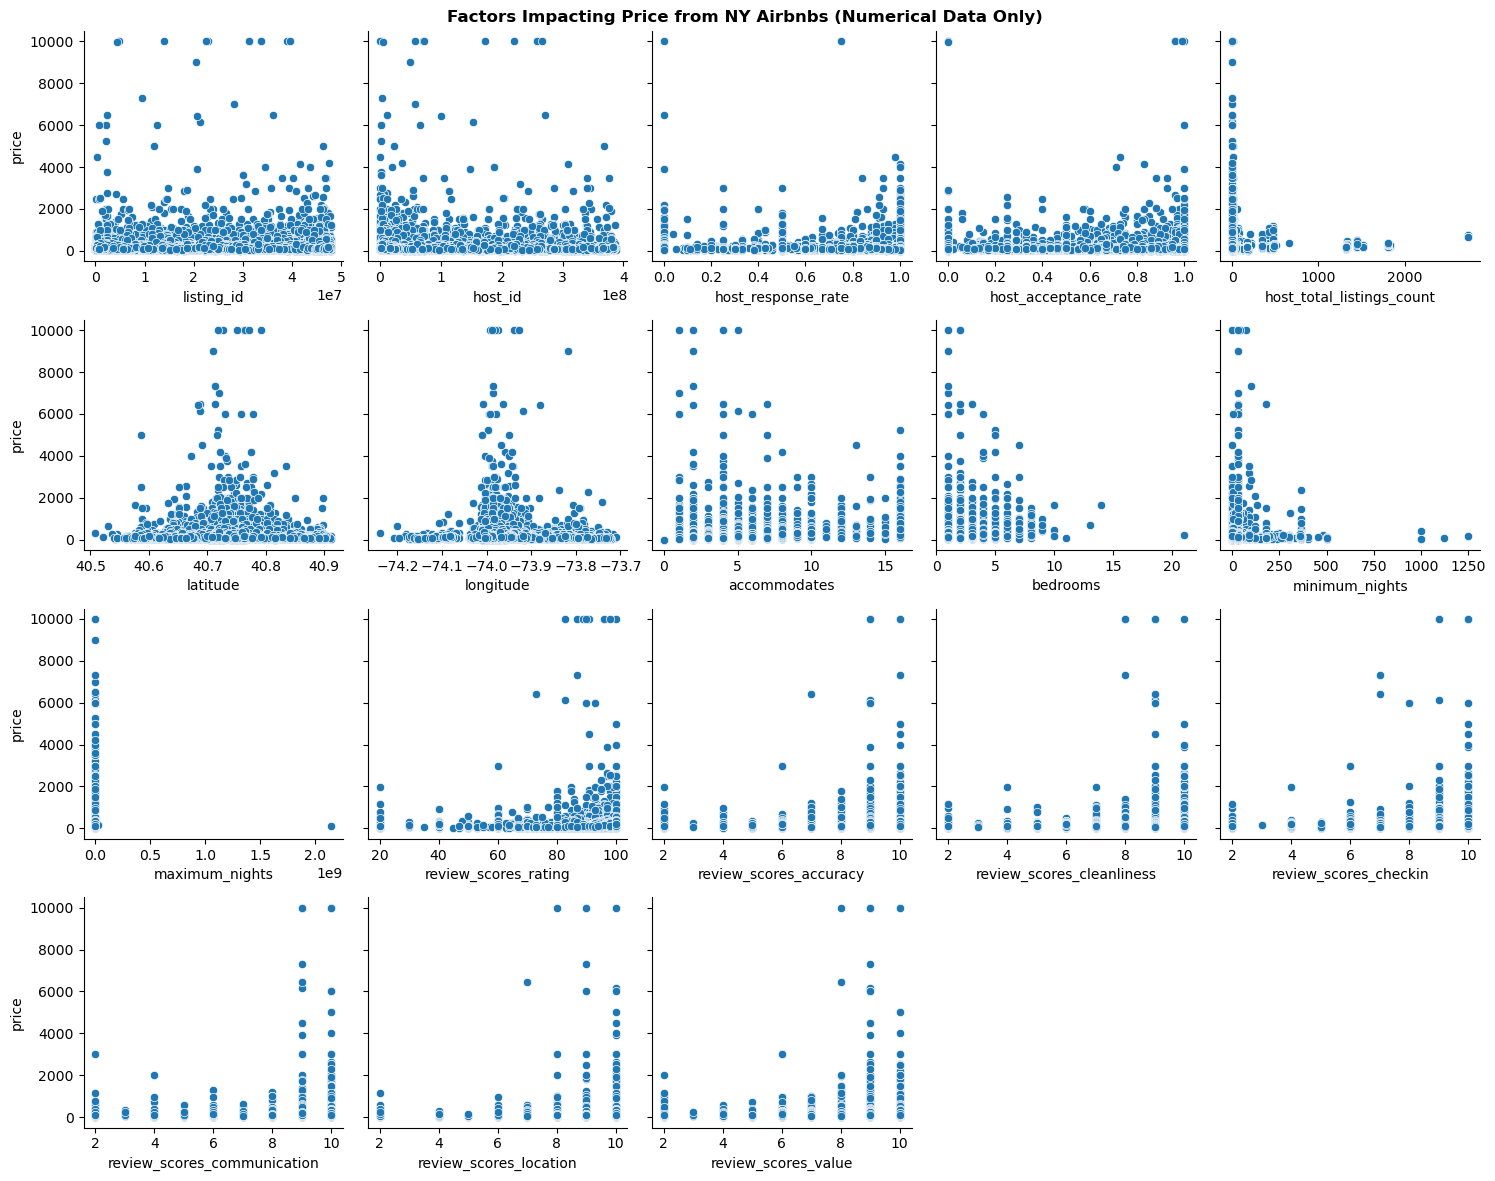

In [13]:
x_vars=num_cols
y_var="price"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=5, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=NY, x=x_var, y=y_var, ax=ax)
    g.set_titles(row_template='', col_template='')


g.fig.suptitle("Factors Impacting Price from NY Airbnbs (Numerical Data Only)", fontsize='large', fontweight='bold')

g.tight_layout()
# g.fig.savefig('img/scatter_plot.png')

In [24]:
num_cols1 = NY.columns[NY.dtypes != 'object'].dropna()
NY_num1=NY[num_cols1].dropna()

# drop y
num_cols1 = num_cols1.drop('review_scores_rating')

NY_num1.head()


,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
26276,42449656,308165996,1.0,1.0,1.0,40.69924,-73.92763,2,1.0,125,30,1125,90.0,10.0,10.0,10.0,8.0,10.0,9.0
26277,44358310,301703046,1.0,1.0,1.0,40.74747,-73.98991,5,1.0,175,30,1125,65.0,8.0,8.0,8.0,7.0,9.0,7.0
26320,457829,2275829,1.0,1.0,1.0,40.72917,-73.98811,4,1.0,110,30,1125,85.0,9.0,9.0,9.0,9.0,10.0,9.0
26321,4956469,25537637,1.0,1.0,1.0,40.75830,-73.77232,4,1.0,81,2,1125,93.0,9.0,9.0,10.0,9.0,9.0,9.0
26322,7962707,42008401,1.0,1.0,1.0,40.75403,-73.91814,4,1.0,140,1,1125,93.0,10.0,9.0,10.0,9.0,9.0,10.0


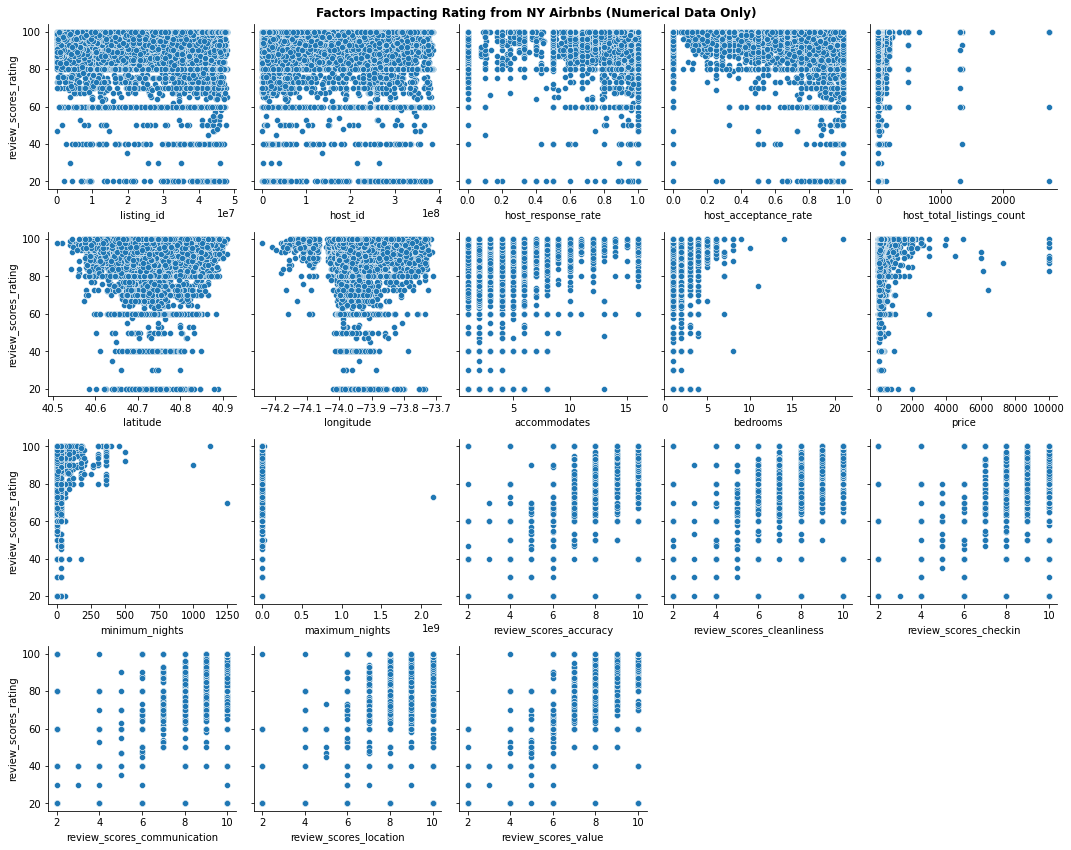

In [25]:
x_vars1=num_cols1
y_var1="review_scores_rating"

g = sns.FacetGrid(pd.DataFrame(x_vars1), col=0, col_wrap=5, sharex=False)
for ax, x_vars1 in zip(g.axes, x_vars1):
    sns.scatterplot(data=NY, x=x_vars1, y=y_var1, ax=ax)
    g.set_titles(row_template='', col_template='')


g.fig.suptitle("Factors Impacting Rating from NY Airbnbs (Numerical Data Only)", fontsize='large', fontweight='bold')

g.tight_layout()
# g.fig.savefig('img/scatter_plot.png')

